In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
raw_train = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/train.csv', index_col = 'row_id')
users = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/users.csv')



In [30]:
testdata = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/test.csv')
test_open = testdata[testdata['last_open_day'] != 'Never open']['user_id'].count()
print(test_open)

48381


37222


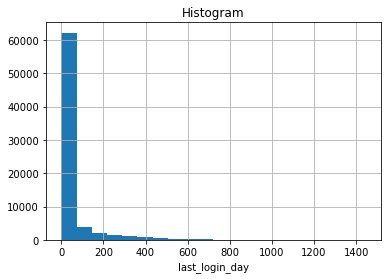

In [31]:
#把last_login_day轉成int，之後要去跑logistic regression
last_login2 = raw_train[raw_train['last_login_day'] != 'Never login']['last_login_day'].values.astype(np.int64)
last_login3 = pd.DataFrame(last_login2, columns = ['last_login_day']).sort_values(by = 'last_login_day')
print(last_login3[last_login3.iloc[:, 0] <= 8]['last_login_day'].count())
#有些值大於1445且為1萬8千多的 我們覺得是資料錯了，所以刪掉
last_login3[last_login3.iloc[:,0] <= 1445].hist(bins = 20)
plt.title('Histogram')
plt.xlabel('last_login_day')
#print(last_login3.iloc[:,0].unique())
plt.show()

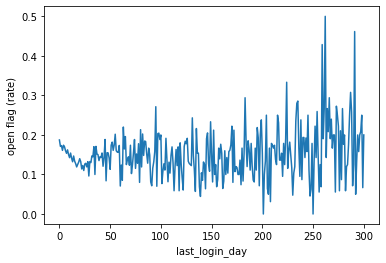

In [32]:
#給Never login一個值 讓他去model跑
login_count = raw_train[raw_train['last_login_day'] != 'Never login'][['last_login_day', 'open_flag']]
login_count['last_login_day'] = login_count['last_login_day'].values.astype(np.int64)

pivot_login = login_count[login_count['last_login_day']<= 300].pivot_table(index = 'last_login_day', values = 'open_flag')
pivot_login['open_flag'].plot()
plt.ylabel('open flag (rate)')
#發現last_login_day和郵件開啟沒什麼關聯
plt.show() # Never login會被改成一個last_login_day的median放到data裡面

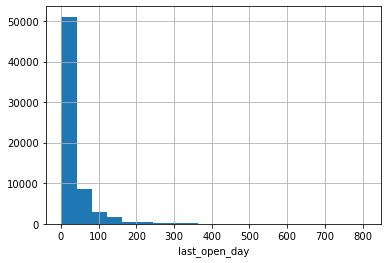

In [33]:
#和last_login_day一樣把數值轉int
last_open = raw_train[raw_train['last_open_day'] != 'Never open']['last_open_day'].values.astype(np.int64)
last_open2 = pd.DataFrame(last_open).sort_values(by = 0)
#print(last_open2.iloc[:,0].unique())
last_open2.iloc[:,0].hist(bins = 20)
plt.xlabel('last_open_day')
plt.show()

last_open_day
1     0.479311
2     0.427636
3     0.351327
4     0.282654
5     0.246215
6     0.222636
7     0.193963
8     0.171700
9     0.141291
10    0.137230
11    0.138776
12    0.117895
13    0.103616
14    0.100148
15    0.103956
16    0.097782
17    0.082234
18    0.090129
19    0.084043
20    0.055677
21    0.071575
22    0.059250
23    0.066272
24    0.072539
25    0.063226
26    0.060753
27    0.062061
28    0.074713
29    0.065789
30    0.059965
Name: open_flag, dtype: float64


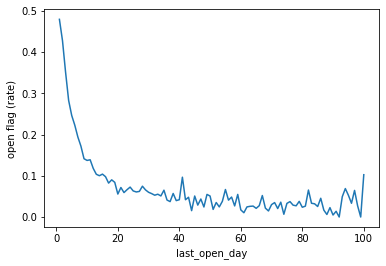

,open_flag
last_open_day,
Never open,0.061586


In [34]:
#轉int
open_count = raw_train[raw_train['last_open_day'] != 'Never open'][['last_open_day', 'open_flag']]
open_count['last_open_day'] = open_count['last_open_day'].values.astype(np.int64)
#看last_open_day和open flag的關係
pivot_open = open_count[open_count['last_open_day']<= 100].pivot_table(index = 'last_open_day', values = 'open_flag')
pivot_open['open_flag'].plot()
print(pivot_open.iloc[0:30, 0])
plt.ylabel('open flag (rate)')
plt.show() #認為應該是exponential correlation
prob_open = raw_train[raw_train['last_open_day'] == 'Never open'][['last_open_day','open_flag']]
#給Nevr open一個last_open_day的mean
prob_open.pivot_table(index = 'last_open_day', values = 'open_flag')

2334


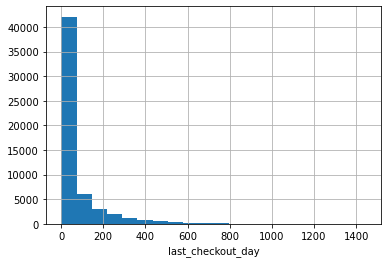

In [35]:
print(raw_train[(raw_train['last_checkout_day'] == 'Never checkout') & (raw_train['open_flag']==1)]['user_id'].count())
#轉integer
last_check = raw_train[raw_train['last_checkout_day'] != 'Never checkout']['last_checkout_day'].values.astype(np.int64)
last_check2 = pd.DataFrame(last_check).sort_values(by = 0)
#print(last_check2.iloc[:,0].unique())
last_check2.iloc[:,0].hist(bins = 20)
plt.xlabel('last_checkout_day')
plt.show()

last_checkout_day
1     0.165829
2     0.187285
3     0.167670
4     0.165617
5     0.149972
6     0.166767
7     0.164722
8     0.170992
9     0.159744
10    0.169811
11    0.172589
12    0.167671
13    0.179487
14    0.144162
15    0.154292
16    0.180072
17    0.155556
18    0.161765
19    0.162347
20    0.136947
21    0.163462
22    0.142857
23    0.165000
24    0.166972
25    0.154955
26    0.157692
27    0.146667
28    0.167323
29    0.176087
30    0.148649
Name: open_flag, dtype: float64


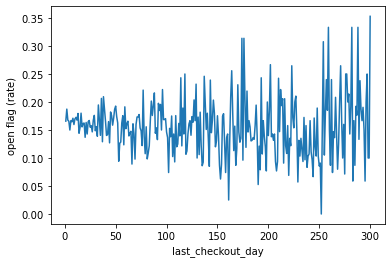

In [36]:
check_count = raw_train[raw_train['last_checkout_day'] != 'Never checkout'][['last_checkout_day', 'open_flag']]
check_count['last_checkout_day'] = check_count['last_checkout_day'].values.astype(np.int64)
# 覺得checkout day和open flag無關聯，因此給了Never checkout一個median值
pivot_check = check_count[check_count['last_checkout_day']<= 300].pivot_table(index = 'last_checkout_day', values = 'open_flag')
pivot_check['open_flag'].plot()
print(pivot_check.iloc[0:30, 0])
plt.ylabel('open flag (rate)')
plt.show() 